In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()  # You will be prompted to upload kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshujharwal2002","key":"f1bd4d5b83fa14d5cb0762c80a7e1f2c"}'}

In [5]:
# create kaggle folder/directory
!mkdir -p ~/.kaggle

In [6]:
# copy the kaggle.json file to created folder
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json  # Set proper permissions for the file

In [8]:
!kaggle datasets download -d parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 53% 5.00M/9.51M [00:00<00:00, 45.2MB/s]
100% 9.51M/9.51M [00:00<00:00, 74.6MB/s]


In [9]:
!unzip credit-score-classification.zip

Archive:  credit-score-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<ipython-input-12-77c8fbed6553>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [13]:
# lets print negative value for each column
import numpy as np




In [14]:
train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [15]:
train.dtypes


,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [16]:
# We are going to drop the following column which is not important for our analysis
train.drop(columns = ['ID','Customer_ID','SSN','Name'], axis=1, inplace=True)

In [17]:
train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [18]:
train.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408


In [19]:
# now change the neccasary data types of columns as require to
# copy for
train_n = train.copy() # for traditional data one
train_p = train.copy()  # pipeline data strcuture

In [20]:
train_n.dtypes

,0
Month,object
Age,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object


In [21]:
train_n.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [22]:
# changed_data_types = ['Age','Annual_Income','Num_of_Loan','Amount_invested_monthly','Monthly_Balance']
# for col in changed_data_types:
#   train_c[col] = pd.to_numeric(train_c[col],errors='coerce')


In [23]:
train_n.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408


### after changing data types we loose some information and get nan

## The Alternative way forward

In [24]:
train_n.dtypes

,0
Month,object
Age,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object


In [25]:
# clean code
# creating copy /backup for dataset
train_n = train_n.copy()

def change_data_type(value):
    try:
        # Convert value to string if it is not already
        if not isinstance(value, str):
            value = str(value)

        # Remove all non-numeric characters except the decimal point
        cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')

        # Ensure only one decimal point is present
        if cleaned_value.count('.') > 1:
            # Keep the first decimal point, remove others
            parts = cleaned_value.split('.')
            cleaned_value = parts[0] + '.' + ''.join(parts[1:])

        # Convert the cleaned value to float
        return float(cleaned_value) if cleaned_value else np.nan
    except ValueError:
        return np.nan

In [26]:
train_n.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [27]:
change_col_dtype = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Outstanding_Debt','Changed_Credit_Limit','Amount_invested_monthly','Monthly_Balance']
for col in change_col_dtype:
  train_n[col] = train_n[col].apply(change_data_type)

In [28]:
train_n.dtypes

,0
Month,object
Age,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,float64
Type_of_Loan,object


In [29]:
train_n['Credit_History_Age']

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
...,...
99995,31 Years and 6 Months
99996,31 Years and 7 Months
99997,31 Years and 8 Months
99998,31 Years and 9 Months


In [30]:
# now we have to deal with credit_history_age column that has different

## Extract the months from credit_history_age

def convert_to_months(age_string):
    if pd.isna(age_string) or age_string == 'NaN':
        return np.nan
    try:
        parts = age_string.split()
        years = int(parts[0])
        months = int(parts[3])
        return years * 12 + months
    except (ValueError, IndexError):
        print(f"Error processing: {age_string}")
        return np.nan


train_n['Credit_History_Age'] = train_n['Credit_History_Age'].apply(convert_to_months)


print(train_n['Credit_History_Age'].head())


0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64


In [31]:
train_n.isnull().sum()

,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Type_of_Loan,11408


Successfully converted data types without loosing much  information

## **Numerical** **Preprocessing**

In [32]:
train_n = train_n.copy()

In [33]:
numeric_col = train_n.select_dtypes(include = ['float64','int64']).columns

In [34]:
for col in numeric_col:
    negative_col = (train_n[col] < 0)
    if negative_col.any():
        count = np.count_nonzero(negative_col)
        print(f"{col}: {count}")

Num_Bank_Accounts: 21
Delay_from_due_date: 591


In [35]:
categ_col = train_n.select_dtypes(exclude = ['float64','int64']).columns

In [36]:
print(numeric_col)
print(categ_col)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')
Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


In [37]:
train_numeric = train_n[numeric_col]

In [38]:
train_numeric.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,23.0,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,809.98,31.944960,NaN,49.574949,118.280222,284.629162
2,500.0,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,23.0,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


In [39]:
train_numeric = train_numeric.copy()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(train_numeric)

train_numeric_imputed = imputer.transform(train_numeric)
# rename the same to have consistency to dataframe
train_numeric = pd.DataFrame(train_numeric_imputed, columns=train_numeric.columns)


In [40]:
imputer.statistics_
# this provide the computed values for replacing missing value i.e. median

array([3.40000000e+01, 3.75786100e+04, 3.09374500e+03, 6.00000000e+00,
       5.00000000e+00, 1.30000000e+01, 3.00000000e+00, 1.80000000e+01,
       1.40000000e+01, 9.40000000e+00, 6.00000000e+00, 1.16615500e+03,
       3.23057837e+01, 2.19000000e+02, 6.92494733e+01, 1.35925682e+02,
       3.36742315e+02])

In [41]:
train_numeric.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089
1,23.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,809.98,31.944960,219.0,49.574949,118.280222,284.629162
2,500.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,3.0,7.0,9.40,4.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863
3,23.0,19114.12,3093.745000,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231


In [42]:
train_numeric.isnull().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


# **Work flow for outlier handling **

<!-- Normal work flow to  -->

# Step 1: Visualize the original distribution
sns.histplot(df['Income'], kde=True)
plt.title('Original Income Distribution')
plt.show()

# Step 2: Check for skewness
skewness = df['Income'].skew()
print(f'Skewness: {skewness}')

# Step 3: Apply log transformation (for positive skew)
df['Log_Income'] = np.log(df['Income'] + 1)

# Step 4: Visualize the transformed distribution
sns.histplot(df['Log_Income'], kde=True)
plt.title('Log Transformed Income Distribution')
plt.show()

# Step 5: Check if the transformation improved normality
stats.probplot(df['Log_Income'], dist="norm", plot=plt)
plt.show()


<!-- skewdness of data by numeric format by shapiro test -->


### **Numerical Sub-preprocessing for Outlier handling**

In [43]:
train_numeric = train_numeric.copy()

***after seeing the numeric data it seems most of column are just positive on except due_date_delayed_payment***

In [44]:
# force the data to positive format
train_numeric.columns


Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [45]:
for col in train_numeric.columns:
    if col != 'Delay_from_due_date':
        train_numeric[col] = np.abs(train_numeric[col])

In [46]:


# #      $ "Consider transformations if the non-normality is due to skewness."$

# # 2 using skewness to determine the non normality

# for col in numeric_col:
#   skewness = train_numeric[col].skew()
#   print(f"{col} : {skewness}")

# print()
# print()

# # 2a stats.skew()
# for col in numeric_col:
#   skewness = stats.skew(train_numeric[col])
#   if abs(skewness) >1:
#     print(f"{col} no noraml")
#   else:
#     print(f"{col} noraml")

In [47]:
from scipy import stats

for col in numeric_col:
    # Calculate skewness before transformation
    skewness_before = stats.skew(train_numeric[col])

    # Check if skewness is significant
    if abs(skewness_before) > 1:
        print(f"Skewness before transformation for {col}: {skewness_before}")

        # Apply log transformation
        if col != 'Delay_from_due_date':
          train_numeric[col] = np.log1p(train_numeric[col])

        # Calculate skewness after transformation
        skewness_after = stats.skew(train_numeric[col])
        print(f"Skewness after transformation for {col}: {skewness_after}")

    else:
        print(f"No transformation needed for {col}, skewness: {skewness_before}")

    print()  # Print a newline for better readability







Skewness before transformation for Age: 9.236716662722339
Skewness after transformation for Age: 4.580776554759014

Skewness before transformation for Annual_Income: 12.511985489391629
Skewness after transformation for Annual_Income: 1.8236147042922033

Skewness before transformation for Monthly_Inhand_Salary: 1.3502569101329118
Skewness after transformation for Monthly_Inhand_Salary: -0.14493429495503418

Skewness before transformation for Num_Bank_Accounts: 11.202321441154007
Skewness after transformation for Num_Bank_Accounts: 2.5628069540455076

Skewness before transformation for Num_Credit_Card: 8.457889695748063
Skewness after transformation for Num_Credit_Card: 4.660924232151538

Skewness before transformation for Interest_Rate: 9.005879963189189
Skewness after transformation for Interest_Rate: 2.494202795872048

Skewness before transformation for Num_of_Loan: 16.605872658839417
Skewness after transformation for Num_of_Loan: 1.6121609694773242

No transformation needed for Delay

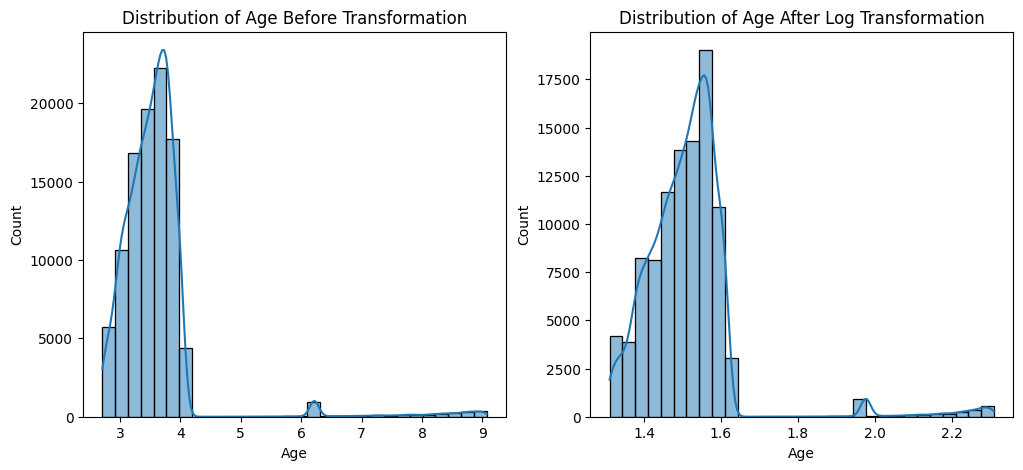

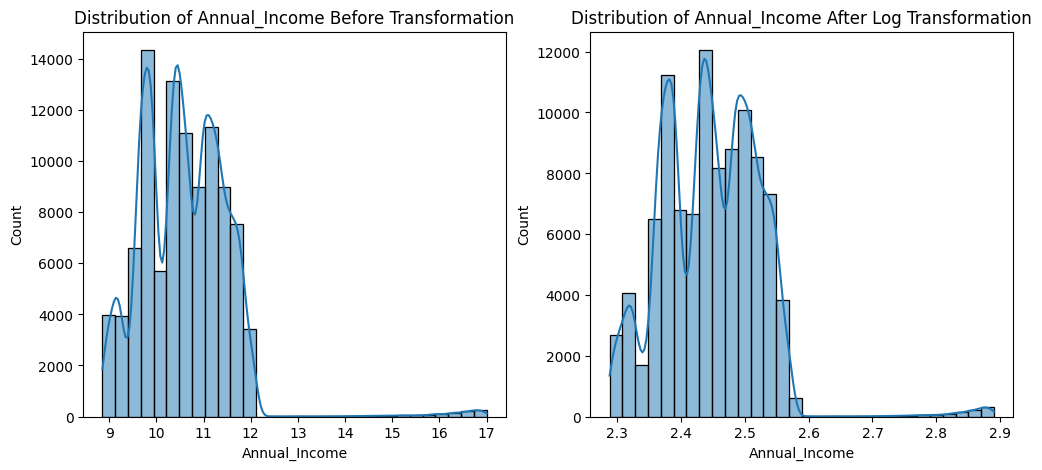

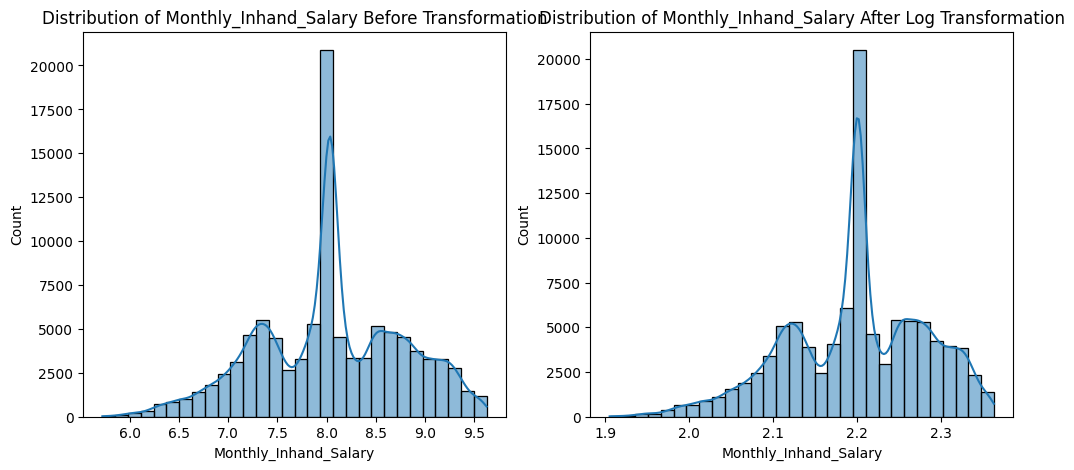

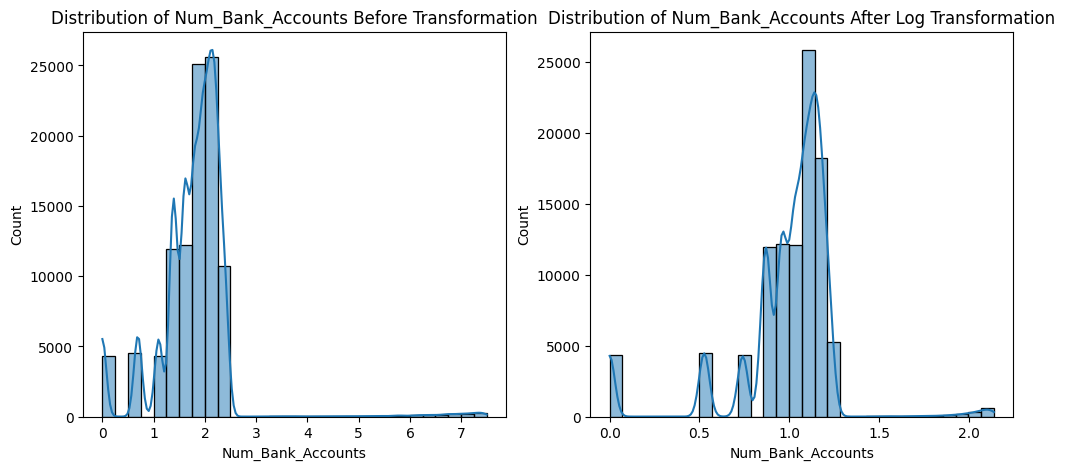

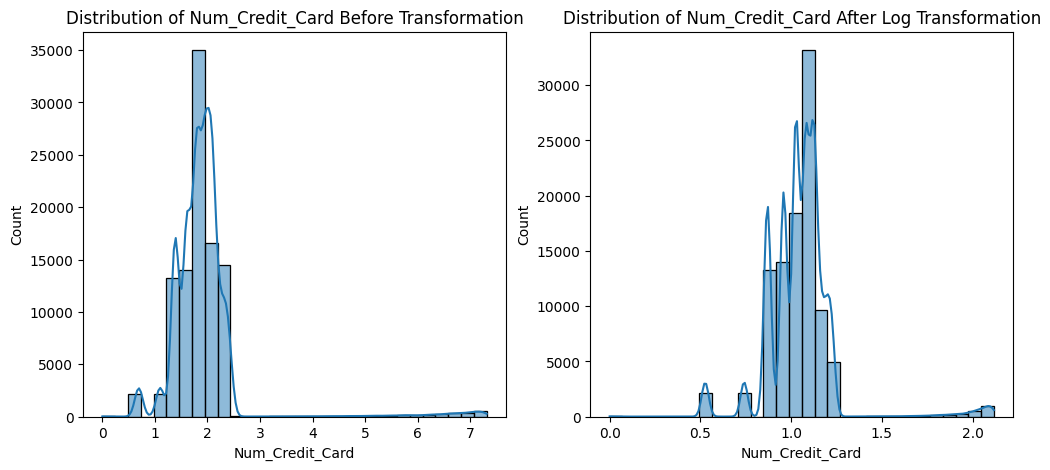

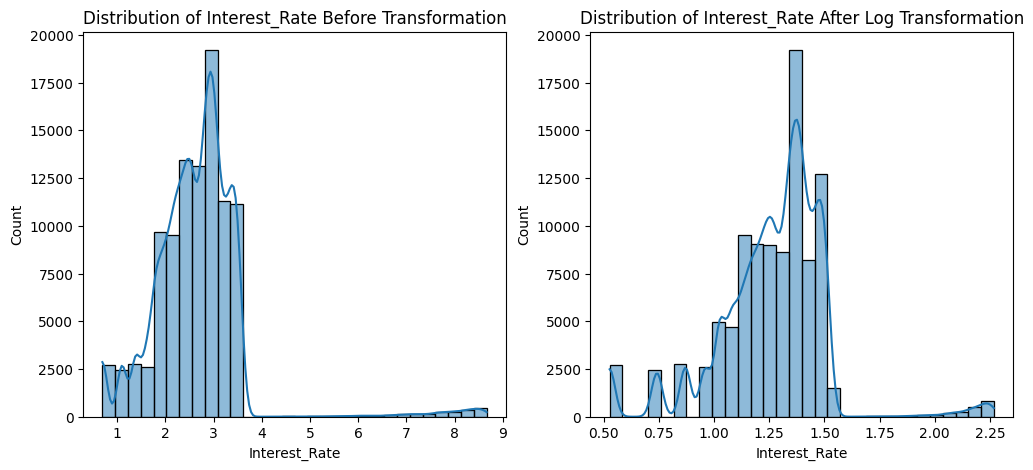

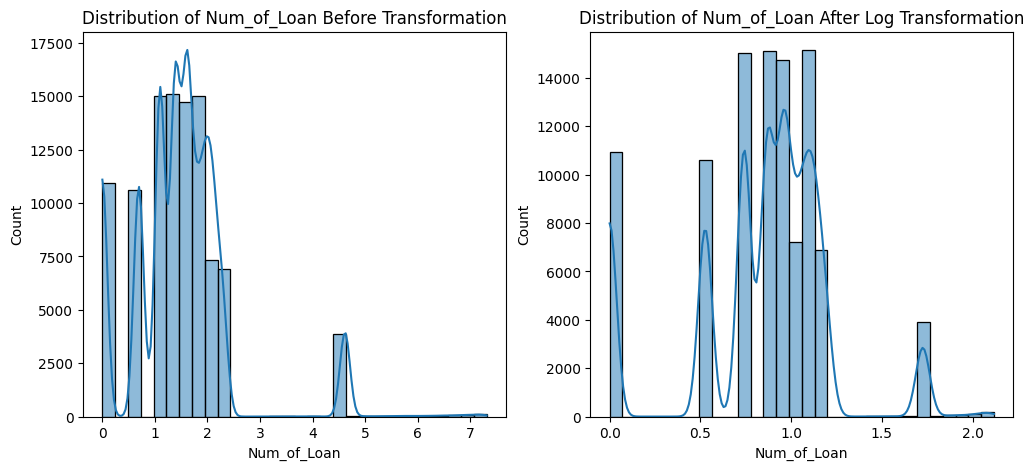

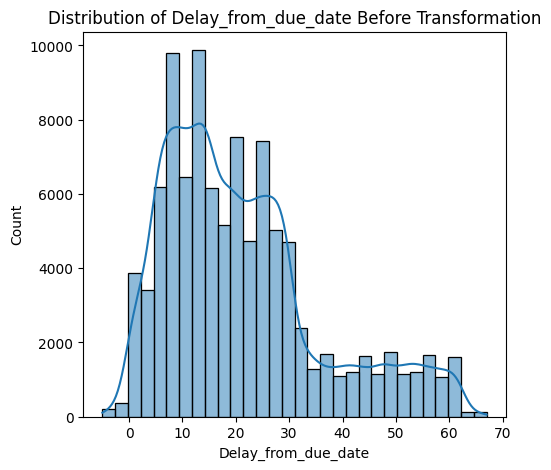

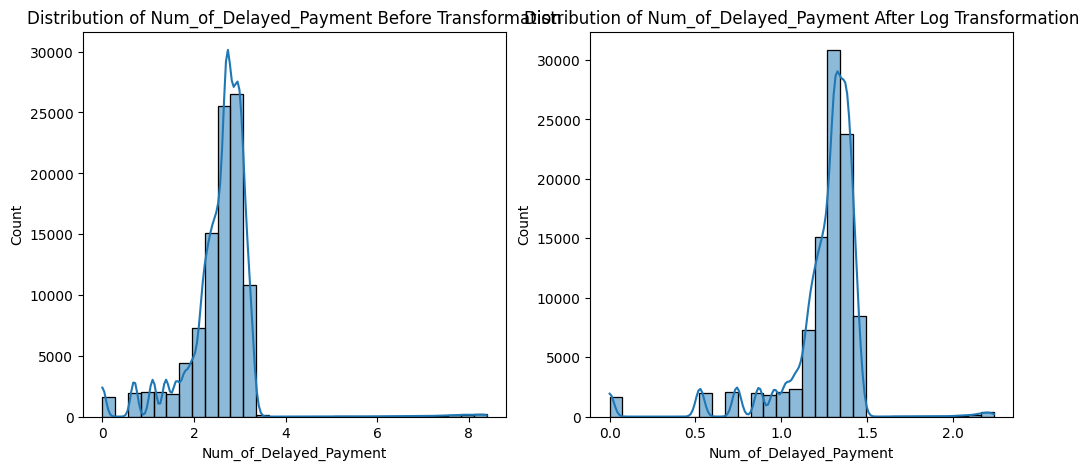

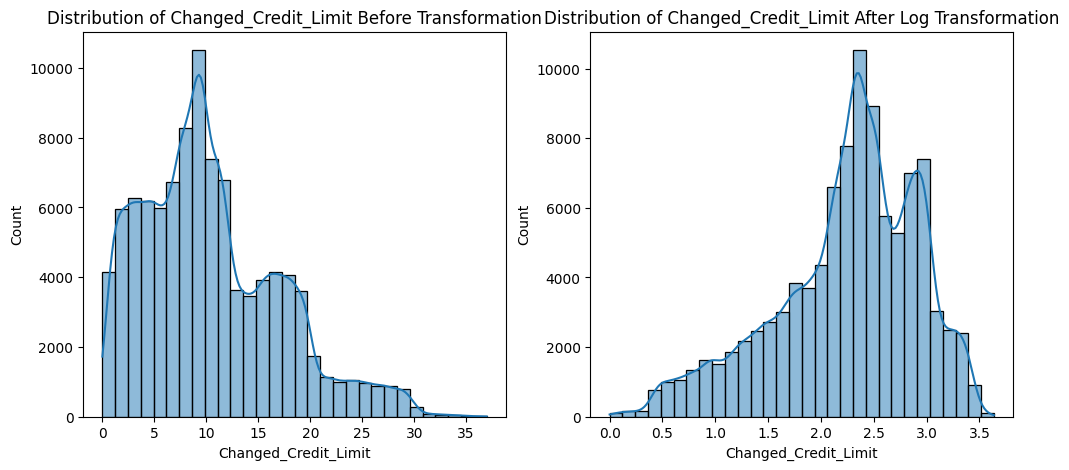

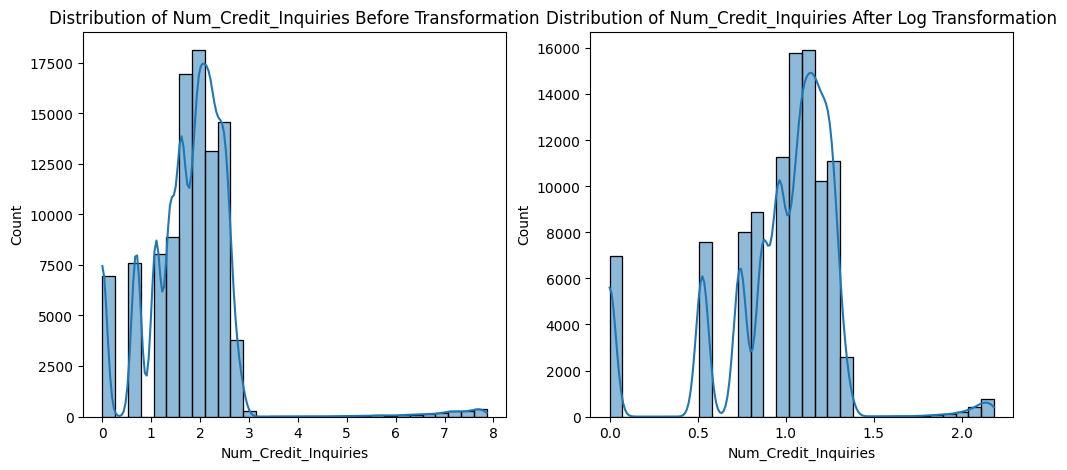

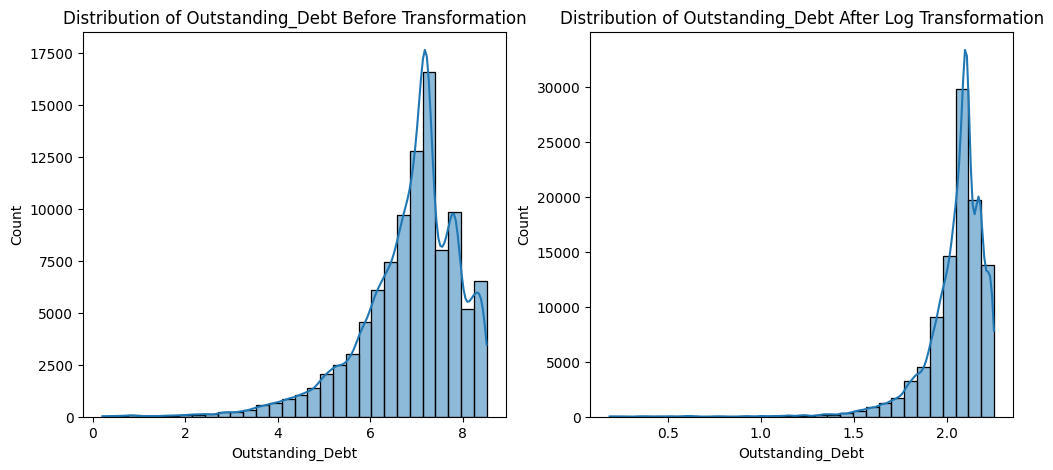

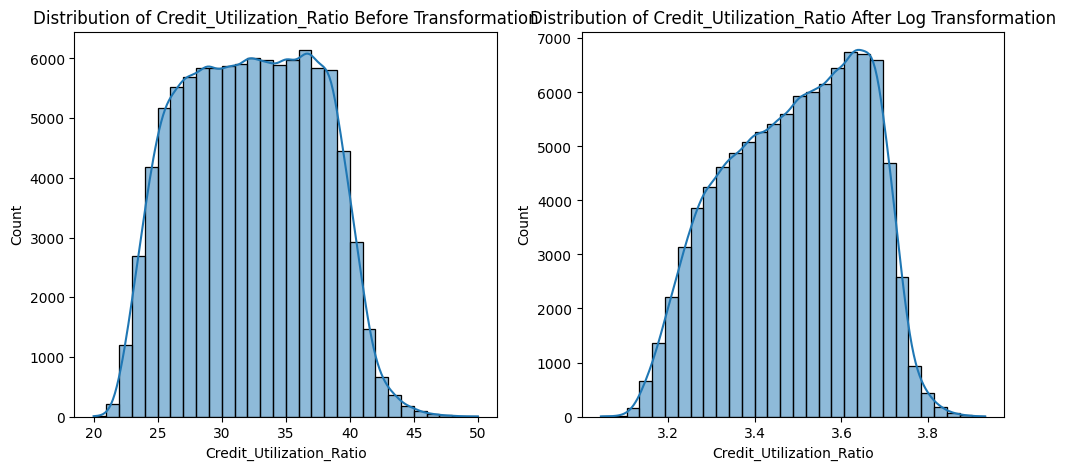

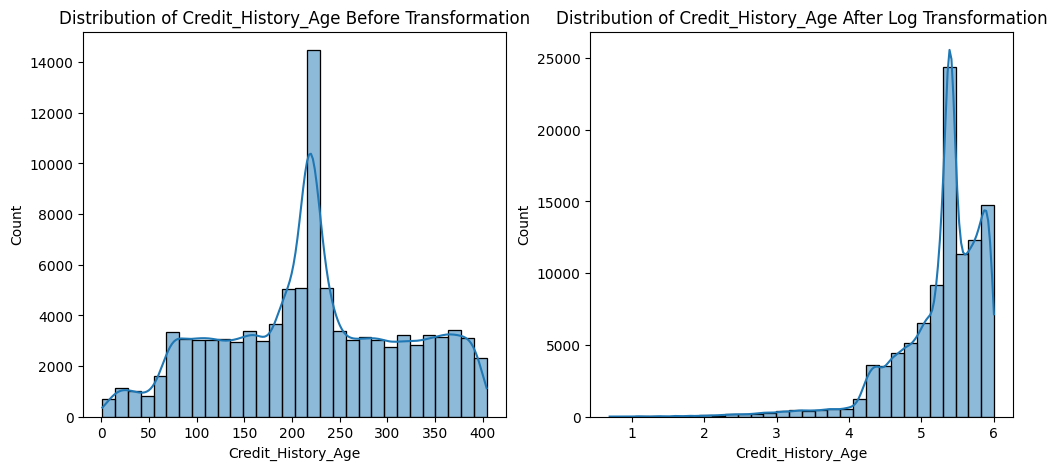

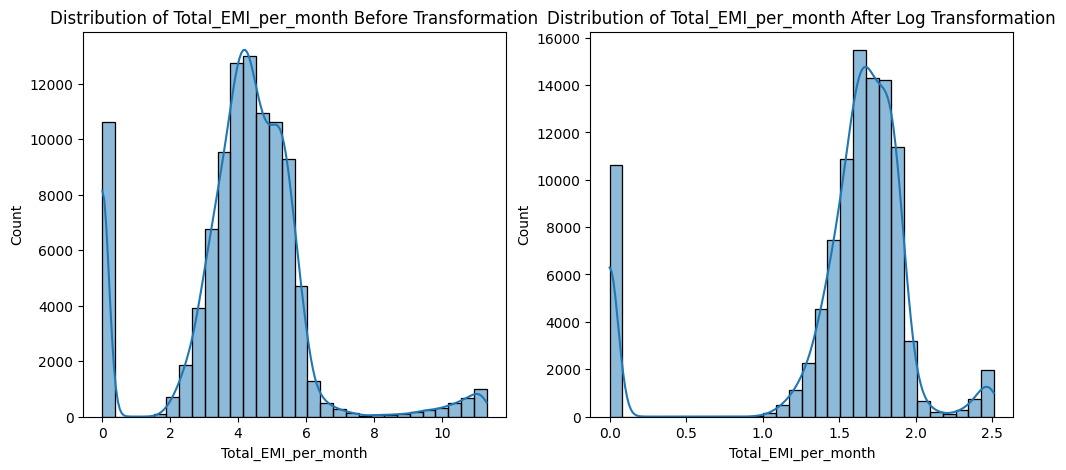

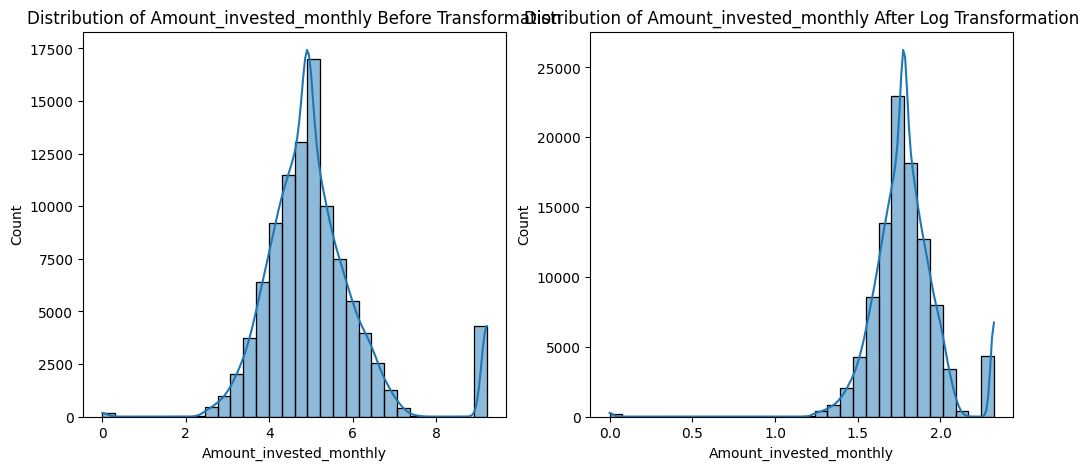

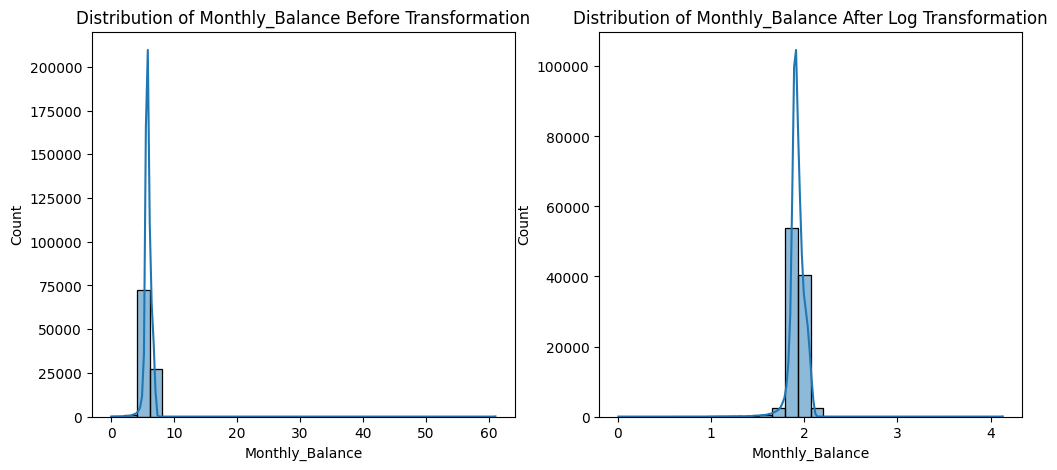

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions before and after transformation
def plot_distributions(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 5))

        # Plot before transformation
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col} Before Transformation')

        # Plot after transformation if applicable
        if col != 'Delay_from_due_date':
            plt.subplot(1, 2, 2)
            sns.histplot(np.log1p(df[col]), bins=30, kde=True)
            plt.title(f'Distribution of {col} After Log Transformation')

        plt.show()

# Call the function with your DataFrame and numeric columns
plot_distributions(train_numeric, numeric_col)

After comparisng the skewness what i found that i don't need to do transformation for all column rather few one who has skewness more than 1

***Get pd framework for five point summary for just understand***

In [49]:
#

q1_describe = train_numeric.describe().loc['25%',]
q2_describe = train_numeric.describe().loc['50%',]
q3_describe = train_numeric.describe().loc['75%',]
iqr = q3_describe - q1_describe

quartile_summary = pd.DataFrame([q1_describe,q2_describe,q3_describe])

In [50]:
quartile_summary.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
25%,3.258097,9.876039,7.491692,1.386294,1.609438,2.197225,1.098612,10.0,2.302585,5.43,1.386294,6.340487,28.052567,154.0,3.443831,4.356932,5.605485
50%,3.555348,10.534217,8.037461,1.945910,1.791759,2.639057,1.386294,18.0,2.708050,9.40,1.945910,7.062324,32.305784,219.0,4.252053,4.919438,5.822283
75%,3.761200,11.195360,8.589053,2.079442,2.079442,3.044522,1.945910,28.0,2.944439,14.66,2.302585,7.574026,36.496663,292.0,5.088980,5.545329,6.150028


In [51]:
quartile_summary.rename(index={'25%':'Q1','50%':'median','75%':'Q3'},inplace=True)

In [52]:
lower_bound = quartile_summary.loc['Q1'] - 1.5 *iqr

In [53]:
# i know my data can not have negative values so

# Check if lower_bound is a Series or DataFrame and extract the value
if isinstance(lower_bound, pd.Series):
    lower_bound_value = lower_bound.iloc[0]  # or lower_bound.values[0]
# because u cant access max in panda dataframe. convert this series to single value series by help of item()
else:
    lower_bound_value = lower_bound

adjusted_lower_bound = max(0, lower_bound_value)


In [54]:
quartile_summary.loc['lower_bound_value'] = adjusted_lower_bound

In [55]:
quartile_summary.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Q1,3.258097,9.876039,7.491692,1.386294,1.609438,2.197225,1.098612,10.000000,2.302585,5.430000,1.386294,6.340487,28.052567,154.000000,3.443831,4.356932,5.605485
median,3.555348,10.534217,8.037461,1.945910,1.791759,2.639057,1.386294,18.000000,2.708050,9.400000,1.945910,7.062324,32.305784,219.000000,4.252053,4.919438,5.822283
Q3,3.761200,11.195360,8.589053,2.079442,2.079442,3.044522,1.945910,28.000000,2.944439,14.660000,2.302585,7.574026,36.496663,292.000000,5.088980,5.545329,6.150028
lower_bound_value,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441


In [56]:
quartile_summary.loc['upper_bound'] = quartile_summary.loc['Q3'] + 1.5 *iqr


In [57]:
quartile_summary.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Q1,3.258097,9.876039,7.491692,1.386294,1.609438,2.197225,1.098612,10.000000,2.302585,5.430000,1.386294,6.340487,28.052567,154.000000,3.443831,4.356932,5.605485
median,3.555348,10.534217,8.037461,1.945910,1.791759,2.639057,1.386294,18.000000,2.708050,9.400000,1.945910,7.062324,32.305784,219.000000,4.252053,4.919438,5.822283
Q3,3.761200,11.195360,8.589053,2.079442,2.079442,3.044522,1.945910,28.000000,2.944439,14.660000,2.302585,7.574026,36.496663,292.000000,5.088980,5.545329,6.150028
lower_bound_value,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441,2.503441
upper_bound,4.515855,13.174342,10.235095,3.119162,2.784447,4.315469,3.216857,55.000000,3.907220,28.505000,3.677021,9.424334,49.162808,499.000000,7.556703,7.327923,6.966843


**Detecting outlier and their percntage of data**

In [58]:
#  get only outlier percentage
def outlier_percentage():
  for col in train_numeric.columns:
      q1 = train_numeric[col].quantile(0.25)
      q3 = train_numeric[col].quantile(0.75)
      iqr = q3 - q1
      if col == 'Delay_from_due_date':  # that has negative value
        lower_bound = q1 - 1.5 * iqr
      else:
        lower_bound = max(0, q1 - 1.5 * iqr) # bcoz no attribute has negative value

      upper_bound = q3 + 1.5 * iqr

      outliers_count = train_numeric[(train_numeric[col] < lower_bound) |
                                                  (train_numeric[col] > upper_bound)].shape[0]
      outlier_percentage = (outliers_count / len(train_numeric)) * 100
      print(f"{col} :: {outlier_percentage:.2f}%")



In [59]:
outlier_percentage()
# **FOR NOW LET OUTLIER BE THE UNHANDLE AND CHECK THE PERFORMACNE **

Age :: 2.78%
Annual_Income :: 0.98%
Monthly_Inhand_Salary :: 0.03%
Num_Bank_Accounts :: 5.64%
Num_Credit_Card :: 4.41%
Interest_Rate :: 4.71%
Num_of_Loan :: 4.34%
Delay_from_due_date :: 4.00%
Num_of_Delayed_Payment :: 6.34%
Changed_Credit_Limit :: 1.19%
Num_Credit_Inquiries :: 8.61%
Outstanding_Debt :: 3.76%
Credit_Utilization_Ratio :: 0.00%
Credit_History_Age :: 0.00%
Total_EMI_per_month :: 13.73%
Amount_invested_monthly :: 4.71%
Monthly_Balance :: 3.91%


In [60]:
# # if variables/columns have outliers percetnage exceeding 5% then use imputation
# # set threshold for outlier handling like 5%
# imputed_col = ['Monthly_Balance','Amount_invested_monthly','Total_EMI_per_month']

# def replace_outlier_with_median(column):
#     column_describe = train_numeric[column].describe()
#     q1 = column_describe['25%']
#     q3 = column_describe['75%']
#     iqr = q3 - q1

#     lower_bound = q1 - 1.5 * iqr

#     # Since your data doesn't have negative values
#     if lower_bound < 0:
#         lower_bound = 0

#     upper_bound = q3 + 1.5 * iqr

#     # Creating boolean mask which has true if outlier or false otherwise
#     outliers_mask = (train_numeric[column] < lower_bound) | (train_numeric[column] > upper_bound)

#     # Calculate median value of the column
#     median_value = train_numeric[column].median()

#     # Replace outliers with the median value
#     train_numeric.loc[outliers_mask, column] = median_value

#     # Print how many outliers were replaced
#     num_replaced = outliers_mask.sum()
#     print(f"{column}: Replaced {num_replaced} outliers with median value.")

# # Apply the function to each column in imputed_col

# for col in imputed_col:
#     replace_outlier_with_median(col)

# # Check result
# print(train_numeric[imputed_col].describe())


In [61]:
outlier_percentage()

Age :: 2.78%
Annual_Income :: 0.98%
Monthly_Inhand_Salary :: 0.03%
Num_Bank_Accounts :: 5.64%
Num_Credit_Card :: 4.41%
Interest_Rate :: 4.71%
Num_of_Loan :: 4.34%
Delay_from_due_date :: 4.00%
Num_of_Delayed_Payment :: 6.34%
Changed_Credit_Limit :: 1.19%
Num_Credit_Inquiries :: 8.61%
Outstanding_Debt :: 3.76%
Credit_Utilization_Ratio :: 0.00%
Credit_History_Age :: 0.00%
Total_EMI_per_month :: 13.73%
Amount_invested_monthly :: 4.71%
Monthly_Balance :: 3.91%


In [62]:
# Apply Transformation ==>>

# def transform_column(df, column, method='log'):
#     if method == 'log':
#         # Apply log transformation for skewed data
#         df[column] = np.log(df[column]+1)  # 1 handles log(0) issue
#     elif method == 'sqrt':
#         # Apply square root transformation
#         df[column] = np.sqrt(df[column])
#     else:
#         raise ValueError("Method must be 'log' or 'sqrt'")

# # Apply transformation for high outlier percentage columns
# for col in ['Monthly_Balance', 'Amount_invested_monthly']:
#     transform_column(train_numeric, col, method='log')


In [63]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compare distributions before and after handling
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=train_numeric[['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance','Num_of_Loan']])
# plt.title('Distribution of Key Columns After Outlier Handling')
# plt.xticks(rotation=45)
# plt.show()


## ***Categorical Preprocessing ***

In [64]:
categ_col = train_n.select_dtypes(exclude = ['float64','int64']).columns
# train_categ = train_n[categ_col]
# train_categ = train_categ.copy()


In [65]:
train_categ2 = train_n[categ_col]
train_categ2 = train_categ2.copy()


In [66]:
train_categ2.isnull().sum()

,0
Month,0
Occupation,0
Type_of_Loan,11408
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [67]:
train_categ2['Type_of_Loan'].value_counts()

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
...,...
"Not Specified, Mortgage Loan, Auto Loan, and Payday Loan",8
"Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan",8
"Debt Consolidation Loan, Auto Loan, Personal Loan, Debt Consolidation Loan, Student Loan, and Credit-Builder Loan",8


In [68]:
train_categ2['Type_of_Loan'].fillna('Not Specified', inplace=True)


<ipython-input-68-5575c953bdaf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_categ2['Type_of_Loan'].fillna('Not Specified', inplace=True)


In [69]:
import re
 # Step 1: Clean the loan list
def clean_loan_list(loan_list):
    if pd.isna(loan_list):
        return []
    # Ensure the loan list is a list of strings, not individual characters
    cleaned = [item.strip() for item in loan_list.split(',') if item.strip()]  # Split on comma and clean
    cleaned = list(set([re.sub(r'\band\b', '', item).strip() for item in cleaned]))  # Remove 'and' phrases and duplicates
    return cleaned

# Apply cleaning to the 'Type_of_Loan' column
train_categ2['Type_of_Loan'] = train_categ2['Type_of_Loan'].apply(clean_loan_list)

In [70]:
train_categ2['Type_of_Loan'].value_counts()


,count
Type_of_Loan,
[Not Specified],12968
[Personal Loan],1488
[Credit-Builder Loan],1488
[Student Loan],1472
[Debt Consolidation Loan],1472
...,...
"[Payday Loan, Student Loan, Auto Loan, Personal Loan]",8
"[Auto Loan, Personal Loan, Not Specified, Home Equity Loan, Payday Loan, Credit-Builder Loan]",8
"[Not Specified, Payday Loan, Auto Loan, Credit-Builder Loan]",8


In [71]:
# mutlibinariser()
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(train_categ2['Type_of_Loan'])

loan_encoded_df = pd.DataFrame(loan_encoded, columns=mlb.classes_, index=train_categ2.index)

# View the result
loan_encoded_df.head()


,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0
2,1,1,0,1,0,0,0,1,0
3,1,1,0,1,0,0,0,1,0
4,1,1,0,1,0,0,0,1,0


In [72]:

train_categ2 = pd.concat([train_categ2, loan_encoded_df], axis=1)
train_categ2 = train_categ2.drop(columns=['Type_of_Loan'])




In [73]:
train_categ2.head()


,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,Scientist,_,No,High_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,1,0,1,0,0,0,1,0
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0


In [74]:
train_categ2.isnull().sum()

,0
Month,0
Occupation,0
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0
Auto Loan,0
Credit-Builder Loan,0
Debt Consolidation Loan,0
Home Equity Loan,0


In [75]:
train_categ21 = train_categ2.copy()

In [76]:
train_categ21['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [77]:
train_categ21['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,36479
Good,24337
_,20195
Bad,18989


In [78]:
# this code ensure that we clean this data in one go wihtout rerun the programm manually
# now randomly assinged the categories for "_" value with their probability
train_categ21['Credit_Mix'] = train_categ21['Credit_Mix'].astype('category').str.strip()
categorical_proportions = train_categ21['Credit_Mix'].value_counts(normalize=True)

while train_categ21['Credit_Mix'].str.contains('_').any():

  mask_underscore_mix = (train_categ21['Credit_Mix'] == "_")
  train_categ21.loc[mask_underscore_mix,'Credit_Mix'] =  np.random.choice(categorical_proportions.index,
                                                                           size=mask_underscore_mix.sum(), # only relevant values replaces
                                                                         p=categorical_proportions
                                                                        )




In [79]:
# but credit mix depend on other variables so we have to do knn based impuation
train_categ21['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,45597
Good,30599
Bad,23804


In [80]:
train_categ21.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,Scientist,Good,No,High_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,1,0,1,0,0,0,1,0
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0


In [81]:
train_categ22 = train_categ21.copy()
train_categ22['Occupation'].value_counts()

,count
Occupation,
_______,7062
Lawyer,6575
Architect,6355
Engineer,6350
Scientist,6299
Mechanic,6291
Accountant,6271
Developer,6235
Media_Manager,6232


In [82]:
# do some imputation for the occupation column
# occupatio does not depend on other columns basically so we do Probability imputation/replacemen

                 # Replacing in one Go using while loop

train_categ22 = train_categ21.copy()
train_categ22['Occupation'] = train_categ22['Occupation'].astype('category').str.strip()
categorical_proportions = train_categ22['Occupation'].value_counts(normalize=True)

# Keep replacing until no '_______' remains
while train_categ22['Occupation'].str.contains('_______').any():

  mask_underscore = (train_categ22['Occupation'] == '_______')


  train_categ22.loc[mask_underscore, 'Occupation'] = np.random.choice(
      categorical_proportions.index,
      size=mask_underscore.sum(),
      p=categorical_proportions
  )

In [83]:
train_categ22['Occupation'].value_counts()

,count
Occupation,
Lawyer,7092
Architect,6878
Engineer,6821
Scientist,6810
Mechanic,6764
Accountant,6735
Developer,6723
Teacher,6682
Media_Manager,6680


In [84]:
train_categ22.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,Scientist,Good,No,High_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,1,0,1,0,0,0,1,0
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0


In [85]:
# handle the Payment_Behaviour unspecified values
train_categ22['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
!@9#%8,7600


In [86]:

# Strip any leading/trailing whitespace from 'Payment_Behaviour' column
train_categ22['Payment_Behaviour'] = train_categ22['Payment_Behaviour'].str.strip()

# Get the normalized value counts
pay_beh_normalized = train_categ22['Payment_Behaviour'].value_counts(normalize=True)

# Exclude '!@9#%8' from the index for random replacement. So only valid entries can get replaced
valid_behaviours = pay_beh_normalized[pay_beh_normalized.index != '!@9#%8']

# Normalize the probabilities again to sum to 1 bcoz it get reduce in size after excluding the invalid entries
valid_behaviours_probs = valid_behaviours / valid_behaviours.sum()

while train_categ22['Payment_Behaviour'].str.contains('!@9#%8').any():
    mask_mixed_number = (train_categ22['Payment_Behaviour'] == '!@9#%8')
    train_categ22.loc[mask_mixed_number, 'Payment_Behaviour'] = np.random.choice(
        valid_behaviours.index,
        size=mask_mixed_number.sum(),
        p=valid_behaviours_probs
    )


In [87]:
train_categ22['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,27660
High_spent_Medium_value_payments,18992
Low_spent_Medium_value_payments,14967
High_spent_Large_value_payments,14845
High_spent_Small_value_payments,12267
Low_spent_Large_value_payments,11269


In [88]:
train_categ23 = train_categ22.copy()

In [89]:
train_categ23.head(10)

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,Scientist,Good,No,High_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,1,0,1,0,0,0,1,0
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
5,June,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
6,July,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
7,August,Scientist,Good,No,High_spent_Medium_value_payments,Standard,1,1,0,1,0,0,0,1,0
8,January,Media_Manager,Good,No,Low_spent_Small_value_payments,Standard,0,1,0,0,0,0,0,0,0
9,February,Teacher,Good,No,High_spent_Large_value_payments,Good,0,1,0,0,0,0,0,0,0


In [90]:
train_categ23['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,52326
No,35667
NM,12007


In [91]:
train_categ23['Payment_of_Min_Amount'] = train_categ23['Payment_of_Min_Amount'].astype('category')
pay_min_proprotion = train_categ23['Payment_of_Min_Amount'].value_counts(normalize = True)
valid_payment = pay_min_proprotion[ pay_min_proprotion.index != 'NM']

valid_payment_prob = valid_payment/valid_payment.sum()

while train_categ23['Payment_of_Min_Amount'].str.contains('NM').any():
  mask_payment_entry = (train_categ23['Payment_of_Min_Amount'] == 'NM')
  train_categ23.loc[mask_payment_entry,'Payment_of_Min_Amount'] = np.random.choice(valid_payment.index,
                                                                                   size = mask_payment_entry.sum(),
                                                                                   p = valid_payment_prob  )


# train_categ23['Payment_of_Min_Amount'] = train_categ23['Payment_of_Min_Amount'].apply(lambda x : np.random.choice(pay_min_proprotion.index, p = pay_min_proprotion)if x == 'NM' else x)




In [92]:
train_categ23['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,59426
No,40574
NM,0


In [93]:
train_categ23.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,January,Scientist,Good,No,High_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
1,February,Scientist,Good,No,Low_spent_Large_value_payments,Good,1,1,0,1,0,0,0,1,0
2,March,Scientist,Good,No,Low_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0
3,April,Scientist,Good,No,Low_spent_Small_value_payments,Good,1,1,0,1,0,0,0,1,0
4,May,Scientist,Good,No,High_spent_Medium_value_payments,Good,1,1,0,1,0,0,0,1,0


In [94]:
train_categ23.columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [95]:
#  one hot encoding

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols = ['Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour']
train_categ23_encoded = train_categ23.copy()

for col in cols:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_data = ohe.fit_transform(train_categ23[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([col]))
    encoded_df.index = train_categ23.index

    train_categ23_encoded = pd.concat([train_categ23_encoded.drop(columns=[col]), encoded_df], axis=1)









In [96]:
train_categ23_encoded.head()

,Month,Occupation,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,January,Scientist,Good,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,February,Scientist,Good,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,March,Scientist,Good,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,April,Scientist,Good,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,May,Scientist,Good,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [97]:
# manual encoding for the target column

train_categ23_encoded['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,53174
Poor,28998
Good,17828


In [98]:
cv_score = {'Standard':1, 'Poor':0, 'Good':2}
train_categ24 = train_categ23_encoded.copy()
train_categ24['Credit_Score'] = train_categ24['Credit_Score'].map(cv_score)


In [99]:
train_categ24['Credit_Score'].value_counts()

,count
Credit_Score,
1,53174
0,28998
2,17828


In [100]:
# target encoding for occupation bcoz it has the enough no. of datapoint and good distribution of categories which does not raise the overfitting problem

mean_target = train_categ24.groupby('Occupation')['Credit_Score'].mean()
# print(mean_target)
train_categ24['Occupation_Encoded'] = train_categ24['Occupation'].map(mean_target)
train_categ24.drop(columns = ['Occupation'], inplace =True)




As we are seeing that majority of Occaption hovering around 84 - 92 , that mean majority of Occuaption has the Standard

In [101]:
train_categ24.head()

,Month,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Encoded
0,January,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.874009
1,February,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.874009
2,March,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.874009
3,April,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.874009
4,May,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.874009


In [102]:

train_categ25 = train_categ24.copy()

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

train_categ25['Month_encoded'] = train_categ25['Month'].map(month_mapping)
print(train_categ25[['Month', 'Month_encoded']].head())
train_categ25.drop(columns = ['Month'], inplace = True)



      Month  Month_encoded
0   January              1
1  February              2
2     March              3
3     April              4
4       May              5


In [103]:
train_categ25.head()

,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Encoded,Month_encoded
0,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.874009,1
1,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.874009,2
2,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.874009,3
3,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.874009,4
4,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.874009,5


In [104]:
train_numeric.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,11.27,1.609438,6.698243,26.822620,265.0,3.923456,4.399563,5.747781
1,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,-1.0,2.708050,11.27,1.609438,6.698243,31.944960,219.0,3.923456,4.781476,5.654694
2,6.216606,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,9.40,1.609438,6.698243,28.609352,267.0,3.923456,4.415214,5.805767
3,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,5.0,1.609438,6.27,1.609438,6.698243,31.377862,268.0,3.923456,5.300605,5.413659
4,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6.0,2.708050,11.27,1.609438,6.698243,24.797347,269.0,3.923456,3.747624,5.836240


In [105]:
# Now concate the Numeric and Categorical dataframe
df = pd.concat([train_numeric, train_categ25],axis =1)

In [106]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Encoded,Month_encoded
0,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,11.27,1.609438,6.698243,26.822620,265.0,3.923456,4.399563,5.747781,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.874009,1
1,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,-1.0,2.708050,11.27,1.609438,6.698243,31.944960,219.0,3.923456,4.781476,5.654694,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.874009,2
2,6.216606,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,9.40,1.609438,6.698243,28.609352,267.0,3.923456,4.415214,5.805767,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.874009,3
3,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,5.0,1.609438,6.27,1.609438,6.698243,31.377862,268.0,3.923456,5.300605,5.413659,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.874009,4
4,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6.0,2.708050,11.27,1.609438,6.698243,24.797347,269.0,3.923456,3.747624,5.836240,2,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.874009,5


In [107]:
# df.to_csv('cleaned_df.csv', index = False)

In [108]:
X = df.drop(columns=['Credit_Score'],axis = 1)
y = df['Credit_Score']

In [109]:
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Occupation_Encoded,Month_encoded
0,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,11.27,1.609438,6.698243,26.822620,265.0,3.923456,4.399563,5.747781,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.874009,1
1,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,-1.0,2.708050,11.27,1.609438,6.698243,31.944960,219.0,3.923456,4.781476,5.654694,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.874009,2
2,6.216606,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,3.0,2.079442,9.40,1.609438,6.698243,28.609352,267.0,3.923456,4.415214,5.805767,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.874009,3
3,3.178054,9.858235,8.037461,1.386294,1.609438,1.386294,1.609438,5.0,1.609438,6.27,1.609438,6.698243,31.377862,268.0,3.923456,5.300605,5.413659,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.874009,4
4,3.178054,9.858235,7.509797,1.386294,1.609438,1.386294,1.609438,6.0,2.708050,11.27,1.609438,6.698243,24.797347,269.0,3.923456,3.747624,5.836240,1,1,0,1,0,0,0,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.874009,5


In [110]:
y.head()

,Credit_Score
0,2
1,2
2,2
3,2
4,2


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test,y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.1,random_state=42)

In [113]:
X_train.shape

(90000, 39)

In [114]:
df_train = X_train.copy()

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [116]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# classifiers = [LogisticRegression(),  DecisionTreeClassifier(), RandomForestClassifier()]

# for classifier in classifiers:
#     score = cross_val_score(classifier, df_train, y_train, cv=5)
#     print(f"{classifier.__class__.__name__} score: {score}")
#     print(f"Mean Cross-Validation Score for {classifier.__class__.__name__}: {np.mean(score)}")

In [117]:
classifiers = [LogisticRegression(),  DecisionTreeClassifier(), RandomForestClassifier()]
for classifier in classifiers:
    # score_train = classifier.fit(df_train, y_train).score(df_train, y_train)
    score_cv = cross_val_score(classifier, df_train, y_train, cv=3).mean()
    # print(f"{classifier.__class__.__name__} Training Score: {score_train}")
    print(f"{classifier.__class__.__name__} Cross-Validation Score: {score_cv}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression Cross-Validation Score: 0.6137777777777778
DecisionTreeClassifier Cross-Validation Score: 0.6765222222222222
RandomForestClassifier Cross-Validation Score: 0.7743555555555556


In [118]:
from sklearn.metrics import  make_scorer, f1_score, roc_auc_score

classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

# Define custom scorers for F1-score (macro) and ROC-AUC (One-vs-Rest for multiclass)
f1_macro_scorer = make_scorer(f1_score, average='macro')


for classifier in classifiers:
    # Accuracy
    accuracy_cv = cross_val_score(classifier, df_train, y_train, cv=3, scoring='accuracy').mean()

    # F1-Score (Macro)
    f1_cv = cross_val_score(classifier, df_train, y_train, cv=3, scoring=f1_macro_scorer).mean()


    print(f"{classifier.__class__.__name__}:")
    print(f"  - Accuracy: {accuracy_cv}")
    print(f"  - F1-Score (Macro): {f1_cv}")

# General Rule of Thumb:
# Large gap (e.g., high accuracy, low F1-score) suggests that the model is not adequately handling the class distribution, especially in the presence of class imbalance.
# In such cases, the F1-score is often a more reliable indicator than accuracy, as it takes into account how well the model performs on both the majority and minority classes.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression:
  - Accuracy: 0.6137777777777778
  - F1-Score (Macro): 0.5575698342866512
DecisionTreeClassifier:
  - Accuracy: 0.6770777777777779
  - F1-Score (Macro): 0.6527367751487981
RandomForestClassifier:
  - Accuracy: 0.7741111111111111
  - F1-Score (Macro): 0.7571490835760907


In [119]:
# SO are getting good accuracy by RandomForestClassifier but there is overfitting issue
# therefore, we are doing the Hyperparameter tuning for that

       ## COARSE TUNING ##

from sklearn.model_selection import GridSearchCV
import time
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']

}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid,
                           cv=3,
                           verbose=1,  # Display progress
                           n_jobs=-1 ) # Use all cores
# Record start time
start_time = time.time()

# Fit the model
grid_search.fit(df_train, y_train)
# Record end time
end_time = time.time()
exectuion_time = ((end_time - start_time)/(60*60))
# Output the best parameters found after refinement
print(f"Best parameters after  tuning: {grid_search.best_params_}")
print(f"best_score: {grid_search.best_score_:.2f}")
print(f"Time taken in execution: {exectuion_time:.2f} hours")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters after  tuning: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_score: 0.78
Time taken in execution: 2.72 hours


our model showing slight improvement (only1%) after fine tuning. That mean our model close to full potiential.Therefore, second/narrow fine tuning is not required

In [130]:
best_rfc_model = grid_search.best_estimator_

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

best_rfc_model.fit(df_train,y_train)

y_pred = best_rfc_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {test_accuracy:.4f}")



Accuracy on the test set: 0.8006


# **How to handle large model with help of joblib in Google colab**

***joblib is better than pickle because it handle large numpy array very effieciently ***

In [123]:
# step1 ==>Use Google Colab with Google Drive for Fast I/O
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [124]:
# step 2 =>
import joblib

# Path to save the model in Google Drive
save_path = '/content/drive/My Drive/large_model_rfc_joblib.joblib'

# Save the model efficiently with joblib
joblib.dump(best_rfc_model, save_path, compress=3)
# compress=3: You can adjust the compression level between 0 (no compression) and 9 (maximum compression).
# The default is 3, which provides a balance between saving time and file size.

# # Load the model from Google Drive
# best_rfc_model = joblib.load(save_path)

In [132]:
# load model from google drive
import joblib
load_path = '/content/drive/My Drive/large_model_rfc_joblib.joblib'

loaded_best_rfc_model = joblib.load(load_path)

y_pred_joblib = loaded_best_rfc_model.predict(X_test)
joblib_accuracy = accuracy_score(y_test, y_pred_joblib)
print(f"Accuracy with joblib loaded model: {joblib_accuracy:.4f}")


Accuracy with joblib loaded model: 0.7983


**THUMB RULE : ==> While it's not mandatory to have the model file in your GitHub repository for cloud deployment, including it can simplify the process if size allows. For larger models, consider using cloud storage or Docker to manage dependencies effectively. This approach provides flexibility and ensures that your deployment process is streamlined and efficient**

***After Doing Refined Tuning if any Significant Improvement there Do some more Hyperparemeter Tuning and if not improvment then stick with previous model with CV = 10 ***

In [ ]:

feature_importances = best_rfc_model.feature_importances_

feature_name = df_train.columns
df_feature_importances = pd.DataFrame({'Feature': feature_name, 'Importance': feature_importances})
df_feature_importances  = df_feature_importances.sort_values(by='Importance', ascending=False)
print(df_feature_importances )




                                              Feature  Importance
11                                   Outstanding_Debt    0.099592
5                                       Interest_Rate    0.080548
7                                 Delay_from_due_date    0.058184
9                                Changed_Credit_Limit    0.054045
13                                 Credit_History_Age    0.051336
10                               Num_Credit_Inquiries    0.041693
4                                     Num_Credit_Card    0.040206
16                                    Monthly_Balance    0.039962
1                                       Annual_Income    0.039575
12                           Credit_Utilization_Ratio    0.038505
15                            Amount_invested_monthly    0.038425
14                                Total_EMI_per_month    0.038144
8                              Num_of_Delayed_Payment    0.037160
2                               Monthly_Inhand_Salary    0.036116
0         

***now we can get the top feature and see the improvement in model ***

***Option 1***: Re-tune Hyperparameters with Top Features ==>> "If Time Allows
***Option 2***: Use Best Estimator model of already fine tune model Directly with Top Features ==>> "If Time is Limited"

In [135]:
# how many feature you need  choose

# top_14_feature = df_feature_importances.head(14).index.to_list()
# print(top_14_feature)
# df_14_feature = df_train.iloc[:,top_14_feature]

In [134]:
# df_14_feature.head()

In [133]:
# # lets first try the already fine tuned model
# top_14_best_rfc = grid_search.best_estimator_
# cv_14_score = cross_val_score(top_14_best_rfc , df_14_feature , y_train, cv = 10 ).mean()
# print(f"top_14_cv_score :{cv_14_score :.4f}")


